# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

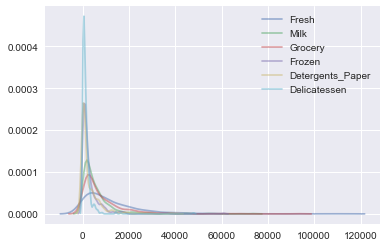

In [3]:
columns = [i for i in data.columns]
for col in columns[:]:
    sns.kdeplot(data[col], alpha=0.5)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5417,9933,10487,38,7572,1282
1,11210,3576,5119,561,1682,2398
2,22335,1196,2406,2046,101,558


Chosen samples v.s. Median of the Sample


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-3087.0,6306.0,5731.5,-1488.0,6755.5,316.5
1,2706.0,-51.0,363.5,-965.0,865.5,1432.5
2,13831.0,-2431.0,-2349.5,520.0,-715.5,-407.5


Percent of Each Components for Each Customer


,Fresh_pct,Milk_pct,Grocery_pct,Frozen_pct,Detergents_Paper_pct
0,0.155979,0.286015,0.301967,0.001094,0.218031
1,0.456694,0.145686,0.208547,0.022855,0.068524
2,0.779799,0.041757,0.084003,0.071434,0.003526


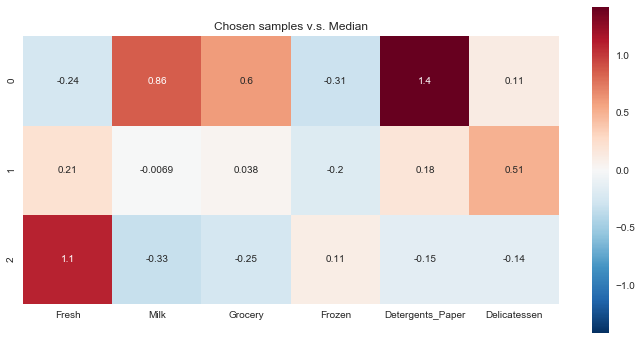

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [57, 243, 368]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

print "Chosen samples v.s. Median of the Sample"
display(samples - data.median().values)


samples_pct = samples.copy()
samples_pct["Total"] = samples_pct[columns].sum(axis = 1)
columns_pct = []
for i in columns[:-1]:
    samples_pct[i+"_pct"] = samples_pct[i]/samples_pct["Total"]
    columns_pct.append(i+"_pct")
    
print "Percent of Each Components for Each Customer"
display(samples_pct[columns_pct])

plt.figure(figsize=[12,6])
plt.axes().set_title("Chosen samples v.s. Median")
sns.heatmap((samples-data.median())/data.std(ddof=0), 
             annot=True, square = True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

- Example 1 (location 57 in the original dataset):

    This example shows a customer with above average consumption of detergents and papers, milk and grocery. This seems to be a corner grocery store.
    
   
- Example 2 (location 243 in the original dataset):

    This example has a lot of delicatessen, compared with other examples in the dataset. Among all the purchase it has made, fresh food also accounts for the majority. This suggests it might be a restuarant with a foreign menu or a specialty grocery store such as a korean food market.


- Example 3 (location 368 in the original dataset) purchase:

    This customer has above average purchase of fresh product and below average purchase for the other categories. My guess is that this might be a shop that sells smoothies or like a salad shop where the fresh products are the main product. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

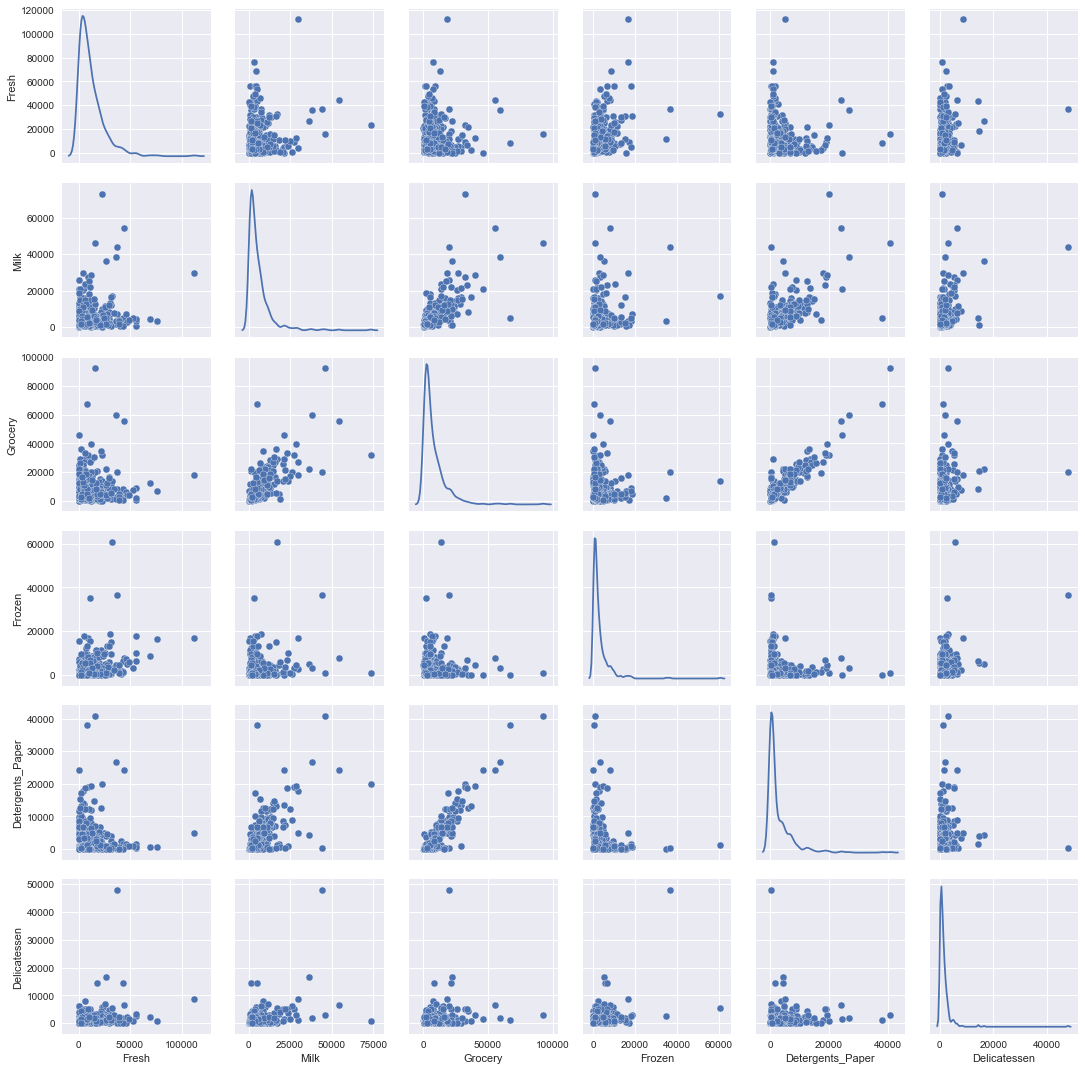

In [5]:
sns.pairplot(data, diag_kind= 'kde')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
for col in columns:
    new_data = data.copy().drop(col, axis = 1)
    new_data_y = data[col].copy()


# TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_data_y,
                                                        test_size =0.25, random_state = 10)

# TODO: Create a decision tree regressor and fit it to the training set
    regressor = tree.DecisionTreeRegressor(random_state=10
                                            , min_samples_leaf=5)
    regressor = regressor.fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("Score by dropping " + col + " is "+ str(score))

Score by dropping Fresh is -0.0420879895879
Score by dropping Milk is 0.61434823528
Score by dropping Grocery is 0.88987375168
Score by dropping Frozen is 0.00491005911886
Score by dropping Detergents_Paper is 0.816533451768
Score by dropping Delicatessen is -1.79414450591


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I tried to all features but initially I would want to drop "Detergents_Paper" based on the pair wise correlation as this feature seems to have a linear relationship with "Grocery".

After iterating each column as the feature to drop, it seems that either "Grocery" or "Detergents_Paper" is a reasonable choice for dropping. Because both variables have a relatively high r^2 score, the default score for decision tree regression. This means that about 80% of the variance in either variable is explain by the rest of the variables. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

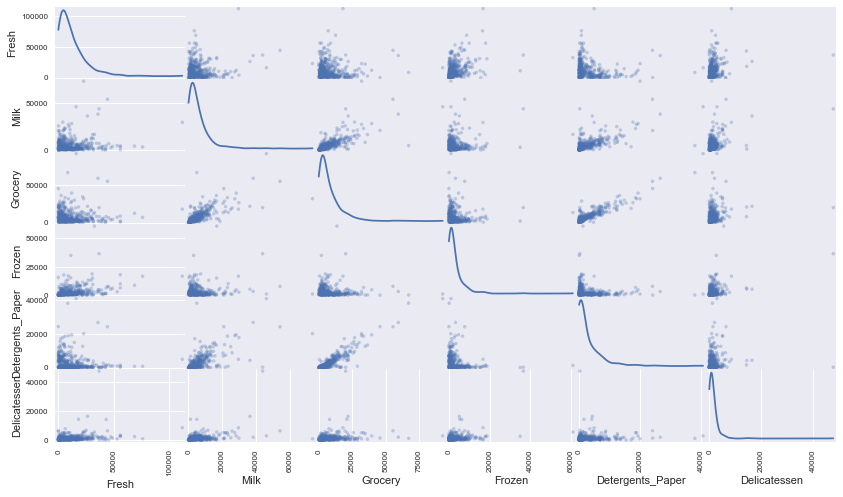

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
There are pairs of features that exhibit a relatively high degree of correlation. For example, "Grocery" seems to be correlated with "Detergents_Paper". "Grocery" seems to also correlate with "Milk". Another pair is "Milk" and "Detergents_Paper". This to a certain degree does confirm with the features I tried to predict, as the results show that "Grocery" is the variable that is explained the most by other variables.

None of the features in this dataset follows a normal distribution. These features are all right-skewed, meaning a long tail on the right. Most of the data points lie on the left of the range, with a few examples to the far right.  


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

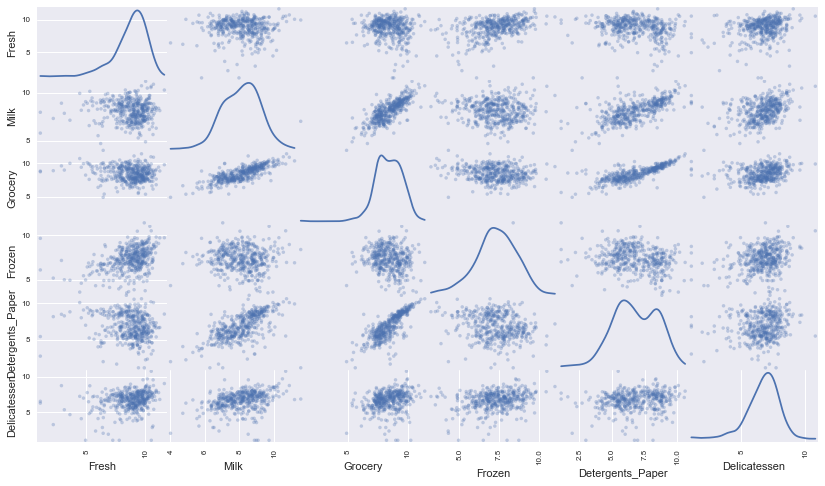

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
1,9.324562,8.182000,8.540714,6.329721,7.427739,7.782390
2,10.013910,7.086738,7.785721,7.623642,4.615121,6.324359


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values
outlier_index_list = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].quantile(0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].quantile(0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outlier_index = [i for i in outlier.index.get_values()]
    display(outlier)
    outlier_index_list.append(outlier_index)
    
# OPTIONAL: Select the indices for data points you wish to remove
import collections
outlier_melt = [i for sublist in outlier_index_list for i in sublist]
counter=collections.Counter(outlier_melt)

outliers = []
for index, count in counter.items():
    if count >=1:
        outliers.append(index)
        
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [14]:
outliers_2 = []
for index, count in counter.items():
    if count>=2:
        outliers_2.append(index)
        
outliers_2

[128, 154, 65, 66, 75]

**Answer:**
Yes. According to the outlier counter, there are five data points that are considered to be outlier by at least two features based on the definition above. One of the five data points, at index 154, is considered as outlier by three features. I included all data points in my outlier list as it is considered as outlier by more than half of the features. Although I note that the two variables that are highly correlated ("Grocery" and "Milk") both consider index 154 as outlier. In a sense, I am double counting the number of features that consider index 154 as outlier.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

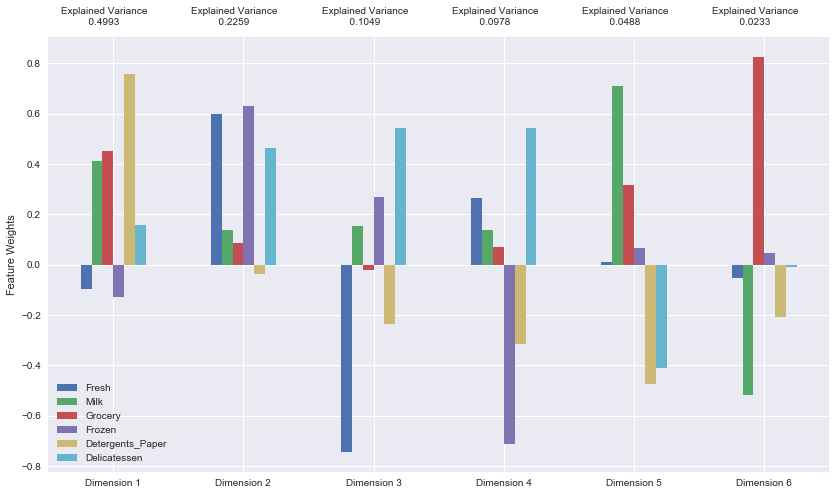

In [15]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first and second principle component explain in total 72.52% (0.4993+0.2259) of the variance. The first four principle components explain in total 93% (0.4993+0.2259+0.1049+0.0978) of the variance.

THe first dimension include mostly milk, grocery and detergent(paper), which fits the purchase pattern of a grocery store; the second dimension sees the largest increase in fresh, frozen and delicatessen categories, which suggest that the customer might be restaurants, cafes, any type of entities that serve food to their customers. The third dimension has an increase in delicatessen and a sligh increase in weight for milk, and decrease in weight for all the other variables. The fourth dimension sees an increase in the weight on fresh and grocery again, but the same weight for delicatessen.





### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0265,-2.2869,-0.9229,2.3395,-0.3863,-0.4764
1,0.8238,-0.0083,-0.1964,1.2378,-0.6946,-0.1459
2,-2.5661,0.4367,-0.6485,0.3885,0.3159,0.4193


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [21]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data.head()


,Dimension 1,Dimension 2
0,1.779322,-0.660449
1,1.882034,0.461741
2,1.993507,1.247080
3,-0.998581,1.369364
4,0.993847,2.078314


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [22]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0265,-2.2869
1,0.8238,-0.0083
2,-2.5661,0.4367


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

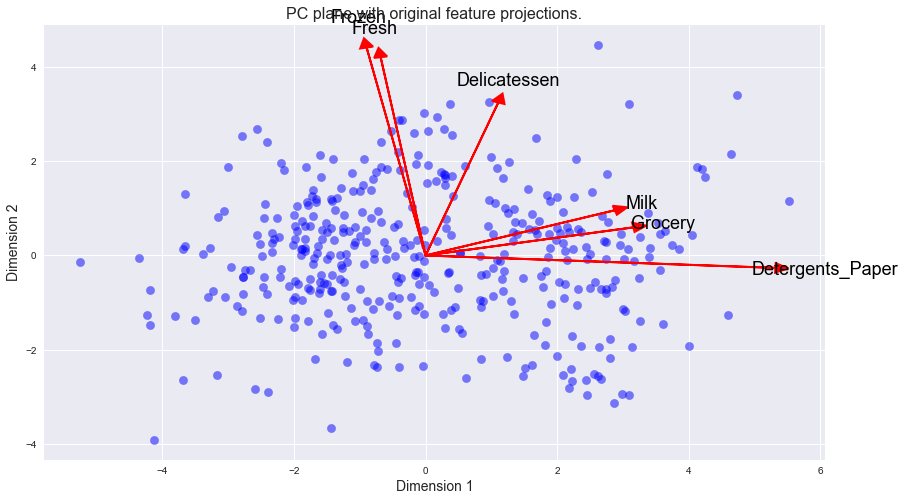

In [23]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
A K-Means clustering algorithm assign each data point to a cluster. It is a hard assignment. On the other hand, a Gaussian Mixture Model ("GMM") is a probability model --- each data point can be assigned to multiple clusters with different probability. This is a "soft assignment".

K-Means is a special case of the Gaussian mixture model, where each subgroup is of equal variance. There are other differences bewteen Gaussian mixture model and K-means [1]:


|Method   |Number of Parameters  |Scalibility |Time|Metric Used   |
|---      |---                   |---         |--- |---|
|K-Means  |The number of clusters|Scalable    |Fast|distance between points   |
|Guasian Mixture Model|Many      |Not Scalable|Slow|Mahalanobis distances to centers  |


K-Means makes the assumption that "clusters are convex and isotropic." If the cluster is not of regular shape, k-means will perform poorly. Our data does not demonstrate clear clusters so a hard assignment might be misleading. Therefore, the Gaussian mixture model is more suitable for our ddata. 

Reference:

[1]. "2.3. Clustering", Scikit Learn, http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [58]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn import metrics


clusterer = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers?
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(reduced_data, preds)



def gmm_cluster(n):
    clusterer = mixture.GaussianMixture(n_components=n, covariance_type='full').fit(reduced_data)
    #preds = clusterer.predict(reduced_data)
    return clusterer


scores = {}

for i in range(2,6):
    predicted_cluster = gmm_cluster(i).predict(reduced_data)
    scores[str(i)+"_clusters"] = metrics.silhouette_score(reduced_data, predicted_cluster)
    
    

In [59]:
scores

{'2_clusters': 0.44675352694453702,
 '3_clusters': 0.36119362503867258,
 '4_clusters': 0.3045071227489729,
 '5_clusters': 0.31670164993118338}

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The number of clusters I tried ranges from 2 to 5. Of these, 2 clusters return the best sihouetter score.  

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [71]:
final_gmm = gmm_cluster(2)
preds = final_gmm.predict(reduced_data)
centers = final_gmm.means_
sample_preds = final_gmm.predict(pca_samples)

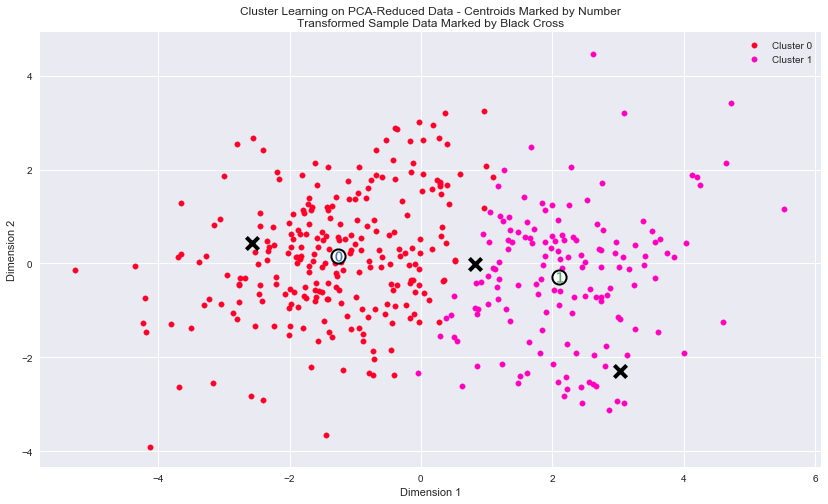

In [74]:
# Display the results of the clustering from implementation

vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [77]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

As shown below in the heatmap, segment 0 are customers who purchase fresh food and frozen food just above the median value of the dataset. Segment 1 buys more milk, grocery, detergent and paper in comparison to the median value of the dataset. Segment 1 also is further above the median, sugguesting larger scale customer. From the bar chart it shows that the majority of purchase in segment 0 is fresh food and the purchase for the rest of the products are much smaller in comparison. The majority of purchase in segment 1 is grocery, followed by milk and grocery. This shows a more balanced mix of product. 

A customer who is assigned to cluster 0 should best identify with the establishments represented by the feature set of segment 0.

Segment 0 seems more likely to be a service end point such as a restaurant or cafe, which needs to be clean and provide napkins to its customers. Segment 1 fits the pattern of a distributor such as a super market or grocery store. To summarize:
- segment 0: restuarant/cafe 
- segment 1: supermarket



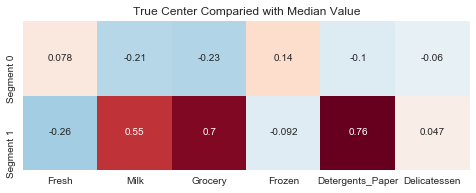

In [128]:
plt.figure(figsize=[8,4])
plt.axes().set_title("True Center Comparied with Median Value")

sns.heatmap((true_centers-data.median())/data.std(ddof=0),
            annot=True, cbar = False, square = True)


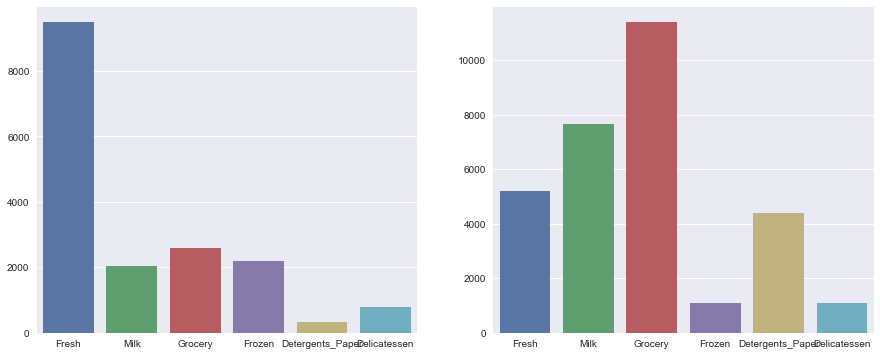

In [126]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,
                       figsize = (15,6))

plt.subplot(1, 2, 1)
sns.barplot(true_centers.columns.values, true_centers.iloc[0].values, )

plt.subplot(1, 2, 2)
sns.barplot(true_centers.columns.values, true_centers.iloc[1].values)

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [81]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

- Sample 0:
    - prediction: Cluster 1, e.g. supermarket
    - initial guess: corner grocery store
    - prediction is *consistent* with initial analysis

- Sample 1：
    - prediction: Cluster 1, e.g. supermarket
    - initial guess: either a foreign restaurant or a specialty food market
    - prediction is *consistent* with initial analysis
    
- Sample 2:
    - prediction: Cluster 0, e.g. restaurant
    - initial guess: salad shop
    - prediction is *consistent* with initial analysis




## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**


We should not assume that the change affects all customers equally. In this case, certain products are more sensitive to a change in delivery schedule than other products. A customer who consume a lot of fresh food, for example, would be less happy about getting delivery 3 days a week instead of 5 days a week. On the other hand, a customer with large purchase of paper, detergent, and frozen food, would not care so much about the frequency of delivery.

Using the current clustering algorithm, the customers are divided into two clusters. Segment 0, with typifies customers such as a restaurant, have a high demand for fresh food. They are unlike to have a positive reaction towards the less frequent delivery. Testing the delivery on customers in segment 0 might end up losing customers permanently due. Customers in segment 1, with a more balanced inventory of different products, are more likely to react positively towards the change in delivery schedule. Therefore, I suggest that the wholesaler consider doing A/B testing on customers in segment 1.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

There are several different ways the wholesale distributor could label the new customers. 

* Use clustering algorithm trained on original dataset 

    The wholesale distributor use the clustering algorithm trained on the original dataset, to predict the **customer segment**. The wholesaler could also use the insights/domain knowledge collected from the existing clustering pattern to manually assign a label. 


* Train new clustering model using original dataset and new data points

    The wholesale distributor could incorporate the new customers and rerun the clustering algorithm on the new dataset, and observe which segment these points are clustered into. 



* Use **customer segment** as the label and train a classification algorithm
    
    The wholesaler could assign a value to the engineered feature "customer segment", use this engineered feature as the label, and train a classification model (such as logistic regression, decision tree classifier, etc.,). Then use the predict function to predict which label these new customers are predicted to have. 



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

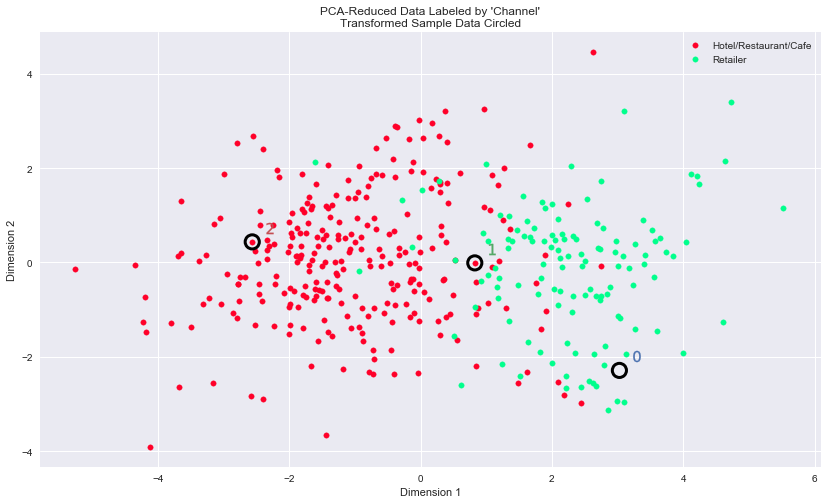

In [99]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm gives very similar results as the underlying distribution of the channel (Hotel/Restaurant/Cafe to Retail). There are customer segment that consist of only "retailers" or only "hotels/restaurants/cafes" only. For example, customers located in the area smaller than -2 in dimension 1 in the PCA-Reduced Dataset are only hotels, restaurants, cafes, and customers located in the area larger than 3 in dimeonsion 1 and smaller than 4 in dimension 2 in the PCA-Reduced dataset, are only retailers. There are other ways to slice and dice the reduced dataset into ares of only one type of customer. Looking at the clustering chart above in the output of line [74], these classifications are consistent with my previous definition. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.